# Python Review Project


In [1]:
import os

print("Current working directory: {0}".format(os.getcwd()))

os.chdir('../analysis_data')

print("New working directory: {0}".format(os.getcwd()))

Current working directory: /mnt/c/Users/Anton/Documents/QBIO490/qbio_490_antonwagner/week11_multiomics
New working directory: /mnt/c/Users/Anton/Documents/QBIO490/qbio_490_antonwagner/analysis_data


In [6]:
# Set up CPTAC

#import cptac
import cptac

# View datadets
cptac.list_datasets()

# Download the clear cell renal cell carcinoma (kidney) data set
cptac.download(dataset="Ccrcc")
ccrcc = cptac.Ccrcc()



In [8]:
ccrcc.list_data()


Below are the dataframes contained in this dataset and their dimensions:

clinical
	194 rows
	171 columns
CNV
	110 rows
	19285 columns
followup
	352 rows
	27 columns
medical_history
	370 rows
	4 columns
methylation
	107 rows
	15885 columns
phosphoproteomics
	194 rows
	81550 columns
phosphoproteomics_gene
	194 rows
	6127 columns
proteomics
	194 rows
	11710 columns
somatic_mutation
	8350 rows
	3 columns
transcriptomics
	185 rows
	19275 columns


In [15]:
import numpy as np # support for arrays and vectorized operations
import pandas as pd # support for DataFrames and Series
import matplotlib.pyplot as plt # main graphing library

import warnings
warnings.filterwarnings('ignore')

In [10]:
# get protein data

protein_data = ccrcc.get_proteomics() # get the proteomics data

protein_data.columns = protein_data.columns.get_level_values(0) 

protein_data # view the data
print(protein_data.shape)

Name,A1BG,A1CF,A2M,A4GALT,AAAS,AACS,AADAC,AADAT,AAED1,AAGAB,...,ZSWIM8,ZSWIM9,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00004,-0.304302,0.641447,-0.000025,NaN,0.207831,-0.364128,NaN,-1.203886,-0.217934,0.216894,...,-0.064343,NaN,-0.094441,NaN,NaN,-0.021827,0.133927,0.237280,0.114409,NaN
C3L-00010,1.195915,0.194620,1.360294,NaN,0.126956,-0.572843,NaN,-1.596546,NaN,0.221696,...,0.112064,NaN,0.072262,NaN,NaN,-0.205642,0.182434,NaN,0.201374,-0.068340
C3L-00011,-0.286155,-0.780455,-0.101089,NaN,0.292629,0.035812,NaN,NaN,NaN,0.300863,...,0.136957,NaN,0.279732,0.695116,NaN,0.316298,-0.009772,-0.019653,-0.095339,0.008961
C3L-00026,0.135730,0.404286,0.261384,NaN,0.155568,0.336311,NaN,NaN,0.709046,0.244198,...,-0.013139,NaN,0.157541,0.526188,NaN,-0.120501,0.054559,-0.313236,0.062194,0.052825
C3L-00079,-0.123959,-0.677773,-0.362547,NaN,0.187605,-0.320026,NaN,-1.300148,-0.153216,0.229676,...,-0.058953,NaN,0.152341,0.072886,0.068182,NaN,0.178869,0.266290,-0.028647,0.003682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01646.N,-0.533915,0.352304,-0.297937,NaN,0.049507,0.421582,NaN,NaN,NaN,0.108650,...,0.148773,NaN,0.215333,NaN,NaN,0.042826,-0.071776,-0.189634,-0.078515,NaN
C3N-01648.N,-0.732322,0.111213,-0.877605,NaN,0.058466,-0.241223,NaN,NaN,NaN,0.166769,...,0.390944,NaN,0.059535,NaN,NaN,0.366396,-0.070845,0.248763,0.140119,0.200438
C3N-01649.N,0.318404,0.065235,-0.261260,NaN,0.013386,0.648428,NaN,NaN,NaN,-0.009946,...,0.198995,NaN,0.074344,-0.633999,NaN,-0.020812,0.162851,-0.571237,0.203220,0.111064


In [11]:
# get RNA data

rna_data = ccrcc.get_transcriptomics()
print(rna_data.shape)
rna_data


Name,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
Patient_ID,,,,,,,,,,,,,,,,,,,,,
C3L-00004,0.995336,16.677828,353.263362,0.046634,0.031027,17.196885,0.896109,15.831130,2.938550,0.019029,...,2.622184,5.415676,5.293887,3.731920,12.541358,2.677696,15.595194,11.401808,9.976986,23.334614
C3L-00010,0.679400,16.682712,359.078446,0.077350,0.068617,13.560508,1.743989,16.690257,3.154143,0.000000,...,2.873604,9.209695,3.669353,2.560578,13.570779,4.097483,15.449647,11.550727,9.432121,25.724814
C3L-00011,0.354549,0.245606,222.075350,0.060736,0.273536,1.321499,0.172369,18.757568,6.942752,0.000000,...,7.998655,28.780560,2.801800,2.503315,10.209840,0.178842,11.670596,11.342045,6.763858,32.090615
C3L-00026,2.543775,16.347532,228.282343,0.085684,0.152020,7.868391,1.448911,17.648610,6.175010,0.031078,...,2.754936,12.639323,5.262024,2.796869,10.718552,0.800663,15.887414,11.788588,8.169953,24.752283
C3L-00079,4.355205,4.858958,275.090167,0.106359,0.000000,6.863003,2.338081,15.480282,4.584445,0.000000,...,7.497914,14.400917,2.907591,2.417113,10.127549,3.442177,12.807428,17.494840,9.733803,24.528238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C3N-01646.N,1.287655,11.076241,228.037113,0.106505,0.066692,8.195971,0.982361,18.086400,10.225658,0.040903,...,2.338694,3.274051,3.500041,3.223773,15.663483,3.219438,17.530849,6.471017,11.860328,25.489666
C3N-01648.N,1.435986,9.772280,291.393930,0.172457,0.214180,8.955806,1.838108,14.597847,6.598100,0.056297,...,1.983803,1.486905,3.865995,3.197000,15.581449,5.774722,17.131855,10.133624,15.256983,22.669748
C3N-01649.N,1.082318,8.378616,249.779349,0.100673,0.160751,7.419323,2.290458,17.666594,11.108717,0.000000,...,2.007450,2.590684,3.805016,2.943559,17.274857,5.856484,16.392044,6.775269,12.881048,25.672959


In [31]:
# get clinical data

clinical_data = ccrcc.get_clinical()
print(clinical_data.shape)
clinical_data
#clinical_data.loc[:, "tumor_stage_pathological"]




#stageI_mask = np.where(clinical_data.loc[:, "tumor_stage_pathological"] == "Stage I", True, False)
#stageIII_mask = np.where(clinical_data.loc[:, "tumor_stage_pathological"] == "Stage III", True, False)
#stageI_clinical = pd.DataFrame(clinical_data[stageI_mask])
#stageIII_clinical = pd.DataFrame(clinical_data[stageIII_mask])



(194, 171)
(185, 19275)
(194, 11710)
Index(['C3L-00004', 'C3L-00010', 'C3L-00011', 'C3L-00026', 'C3L-00079',
       'C3L-00088', 'C3L-00096', 'C3L-00097', 'C3L-00103', 'C3L-00183',
       ...
       'C3N-01220.N', 'C3N-01261.N', 'C3N-01361.N', 'C3N-01522.N',
       'C3N-01524.N', 'C3N-01646.N', 'C3N-01648.N', 'C3N-01649.N',
       'C3N-01651.N', 'C3N-01808.N'],
      dtype='object', name='Patient_ID', length=194)
Index(['C3L-00004', 'C3L-00010', 'C3L-00011', 'C3L-00026', 'C3L-00079',
       'C3L-00088', 'C3L-00096', 'C3L-00097', 'C3L-00103', 'C3L-00183',
       ...
       'C3N-01220.N', 'C3N-01261.N', 'C3N-01361.N', 'C3N-01522.N',
       'C3N-01524.N', 'C3N-01646.N', 'C3N-01648.N', 'C3N-01649.N',
       'C3N-01651.N', 'C3N-01808.N'],
      dtype='object', name='Patient_ID', length=185)


In [81]:
# Find the top 5 DE RNA

# mask out patient IDs who do not have rna_data
clinical_data_with_rna = clinical_data.loc[rna_data.index, :]

# create masks for the two clinical feature groups
stageI_mask_with_rna = np.where(clinical_data_with_rna.loc[:, "tumor_stage_pathological"] == "Stage I", True, False)
stageIII_mask_with_rna = np.where(clinical_data_with_rna.loc[:, "tumor_stage_pathological"] == "Stage III", True, False)

# create new clinical dataframe with mask
stageI_clinical_with_rna = pd.DataFrame(clinical_data_with_rna[stageI_mask_with_rna])
stageIII_clinical_with_rna = pd.DataFrame(clinical_data_with_rna[stageIII_mask_with_rna])

# create new rna dataframe with mask
stageI_rna = pd.DataFrame(rna_data[stageI_mask_with_rna])
stageIII_rna = pd.DataFrame(rna_data[stageIII_mask_with_rna])

# drop NaN values
stageI_rna = stageI_rna.dropna(axis="columns")
stageIII_rna = stageIII_rna.dropna(axis="columns")

# apply log2 to rna_data 
stageI_rna = np.log2(stageI_rna)
stageIII_rna = np.log2(stageIII_rna)

# mask out NA values
stageI_rna = stageI_rna.dropna(axis="columns")
stageIII_rna = stageIII_rna.dropna(axis="columns")

# mask out infinity values
stageI_inf_mask = np.where(stageI_rna.loc[:,:] == '-inf', False, True)
stageIII_inf_mask = np.where(stageIII_rna.loc[:,:] == '-inf', False, True)
stageI_rna = pd.DataFrame(stageI_rna[stageI_inf_mask])
stageIII_rna = pd.DataFrame(stageIII_rna[stageIII_inf_mask])

# Create lists to store DE results
top5_rna_list = ["", "", "", "", ""]
rna_top5_DE = [0, 0, 0, 0, 0]

# Find the top 5 DE RNA
for col in rna_data.columns:
    if col in stageI_rna and col in stageIII_rna:
        sum = 0
        counter = 0
        for row in stageI_rna.index:
            if stageI_rna.loc[row,col] != float('-inf') and stageI_rna.loc[row,col] != float('inf'):
                sum += stageI_rna.loc[row, col]
                counter += 1
        if counter == 0:
            counter = stageI_mean_expression
        stageI_mean_expression = sum / counter
        #print('stageI_mean_expression =', stageI_mean_expression)

        sum = 0
        counter = 0
        for row in stageIII_rna.index:
            if stageIII_rna.loc[row,col] != float('-inf') and stageIII_rna.loc[row,col] != float('inf'):
                sum += stageIII_rna.loc[row, col]
                counter += 1
        if counter == 0:
            counter = stageI_mean_expression
        stageIII_mean_expression = sum / counter
        #print('stageIII_mean_expression =', stageIII_mean_expression)

        differential_expression = abs(stageI_mean_expression - stageIII_mean_expression)
        #print(differential_expression)

        if differential_expression > rna_top5_DE[4]:
            if differential_expression > rna_top5_DE[3]:
                if differential_expression > rna_top5_DE[2]:
                    if differential_expression > rna_top5_DE[1]:
                        if differential_expression > rna_top5_DE[0]:
                            rna_top5_DE[4] = rna_top5_DE[3]
                            top5_rna_list[4] = top5_rna_list[3]
                            rna_top5_DE[3] = rna_top5_DE[2]
                            top5_rna_list[3] = top5_rna_list[2]
                            rna_top5_DE[2] = rna_top5_DE[1]
                            top5_rna_list[2] = top5_rna_list[1]
                            rna_top5_DE[1] = rna_top5_DE[0]
                            top5_rna_list[1] = top5_rna_list[0]
                            rna_top5_DE[0] = differential_expression
                            top5_rna_list[0] = col
                        else:
                            rna_top5_DE[4] = rna_top5_DE[3]
                            top5_rna_list[4] = top5_rna_list[3]
                            rna_top5_DE[3] = rna_top5_DE[2]
                            top5_rna_list[3] = top5_rna_list[2]
                            rna_top5_DE[2] = rna_top5_DE[1]
                            top5_rna_list[2] = top5_rna_list[1]
                            rna_top5_DE[1] = differential_expression
                            top5_rna_list[1] = col
                    else:
                        rna_top5_DE[4] = rna_top5_DE[3]
                        top5_rna_list[4] = top5_rna_list[3]
                        rna_top5_DE[3] = rna_top5_DE[2]
                        top5_rna_list[3] = top5_rna_list[2]
                        rna_top5_DE[2] = differential_expression
                        top5_rna_list[2] = col
                else:
                    rna_top5_DE[4] = rna_top5_DE[3]
                    top5_rna_list[4] = top5_rna_list[3]
                    rna_top5_DE[3] = differential_expression
                    top5_rna_list[3] = col
            else:
                rna_top5_DE[4] = differential_expression
                top5_rna_list[4] = col

print('Top 5 DE RNAs: ', top5_rna_list)
print('DE values: ', rna_top5_DE)

(52, 19275)
(33, 19275)
(52, 19275)
(33, 19275)
(52, 19275)
(33, 19275)
Top 5 DE RNAs:  ['GOLGA6L6', 'MC2R', 'DAZ3', 'POU4F2', 'DMRTC1']
DE values:  [7.153418551486383, 7.132682222762514, 7.033575516325423, 6.894193362873844, 6.692340797052858]


In [135]:
# Find top 5 DE proteins

# create masks for the two clinical feature groups
stageI_mask = np.where(clinical_data.loc[:, "tumor_stage_pathological"] == "Stage I", True, False)
stageIII_mask = np.where(clinical_data.loc[:, "tumor_stage_pathological"] == "Stage III", True, False)

# create new clinical dataframe with mask
stageI_clinical = pd.DataFrame(clinical_data[stageI_mask])
stageIII_clinical = pd.DataFrame(clinical_data[stageIII_mask])

# create new protein dataframe with mask
stageI_protein = pd.DataFrame(protein_data[stageI_mask])
stageIII_protein = pd.DataFrame(protein_data[stageIII_mask])

#print('stageI_protein.shape', stageI_protein.shape)
#print('stageIII_protein.shape', stageIII_protein.shape)


# mask out infinity values
stageI_negative_inf_mask = np.where(stageI_protein.loc[:,:] == float('-inf'), False, True)
stageIII_negative_inf_mask = np.where(stageIII_protein.loc[:,:] == float('-inf'), False, True)
stageI_protein = pd.DataFrame(stageI_protein[stageI_negative_inf_mask])
stageIII_protein = pd.DataFrame(stageIII_protein[stageIII_negative_inf_mask])
stageI_positive_inf_mask = np.where(stageI_protein.loc[:,:] == float('inf'), False, True)
stageIII_positive_inf_mask = np.where(stageIII_protein.loc[:,:] == float('inf'), False, True)
stageI_protein = pd.DataFrame(stageI_protein[stageI_positive_inf_mask])
stageIII_protein = pd.DataFrame(stageIII_protein[stageIII_positive_inf_mask])

# filter out NaN values
#print(stageI_protein.shape)
#print(stageIII_protein.shape)

stageI_protein = stageI_protein.dropna(axis="columns")
stageIII_protein = stageIII_protein.dropna(axis="columns")

#print(stageI_protein.shape)
#print(stageIII_protein.shape)



#print('Checkpoint 1')
#y = """
# Create lists to store DE results
top5_protein_list = ["", "", "", "", ""]
protein_top5_DE = [0, 0, 0, 0, 0]

#print('Checkpoint 2')

loop_counter = 0
# Find the top 5 DE protein
for col in protein_data.columns:
    #print(col)
    #print(bool(col in stageI_protein))
    #print(bool(col in stageIII_protein))
    if bool(col in stageI_protein) & bool(col in stageIII_protein):
        #print('Checkpoint 3')
        #loop_counter += 1
        #print('loop_counter = ',loop_counter)
        sum = 0
        counter = 0
        for row in stageI_protein.index:
            #if stageI_protein.loc[row,col] != float('-inf') and stageI_protein.loc[row,col] != float('inf'):
            #print('Checkpoint 4')
            #if stageI_protein.loc[row,col] != "NaN":
            #if stageI_protein.loc[row,col].isnan():
            sum += stageI_protein.loc[row, col]
            counter += 1
            #else:
            #    print('error, stageI')
        stageI_mean_expression = sum / counter
        #print('Checkpoint 4')
        sum = 0
        counter = 0
        for row in stageIII_protein.index:
            #if stageIII_protein.loc[row,col] != float('-inf') and stageIII_protein.loc[row,col] != float('inf'):
            #if stageIII_protein.loc[row,col] != "NaN":
            #if stageI_protein.loc[row,col].isnan():
            sum += stageIII_protein.loc[row, col]
            counter += 1
            #else:
            #    print('error, stageIII')
        stageIII_mean_expression = sum / counter
        #print('Checkpoint 5')

        differential_expression = abs(stageI_mean_expression - stageIII_mean_expression)

        #print('Checkpoint 6', col)
        #print('stageI_mean_expression = ', stageI_mean_expression)
        #print('stageIII_mean_expression =', stageIII_mean_expression)
        #print('differential_expression = ', differential_expression)
        
        
        
        #if not isinstance(differential_expression, np.float64):
        #if not (differential_expression.dtype == np.float64): 
        try:
            #print('Checkpoint')
            if differential_expression > protein_top5_DE[4]:
                #print('Checkpoint 7')
                if differential_expression > protein_top5_DE[3]:
                    #print('Checkpoint 8')
                    if differential_expression > protein_top5_DE[2]:
                        #print('Checkpoint 9')
                        if differential_expression > protein_top5_DE[1]:
                            if differential_expression > protein_top5_DE[0]:
                                protein_top5_DE[4] = protein_top5_DE[3]
                                top5_protein_list[4] = top5_protein_list[3]
                                protein_top5_DE[3] = protein_top5_DE[2]
                                top5_protein_list[3] = top5_protein_list[2]
                                protein_top5_DE[2] = protein_top5_DE[1]
                                top5_protein_list[2] = top5_protein_list[1]
                                protein_top5_DE[1] = protein_top5_DE[0]
                                top5_protein_list[1] = top5_protein_list[0]
                                protein_top5_DE[0] = differential_expression
                                top5_protein_list[0] = col
                            else:
                                protein_top5_DE[4] = protein_top5_DE[3]
                                top5_protein_list[4] = top5_protein_list[3]
                                protein_top5_DE[3] = protein_top5_DE[2]
                                top5_protein_list[3] = top5_protein_list[2]
                                protein_top5_DE[2] = protein_top5_DE[1]
                                top5_protein_list[2] = top5_protein_list[1]
                                protein_top5_DE[1] = differential_expression
                                top5_protein_list[1] = col
                        else:
                            protein_top5_DE[4] = protein_top5_DE[3]
                            top5_protein_list[4] = top5_protein_list[3]
                            protein_top5_DE[3] = protein_top5_DE[2]
                            top5_protein_list[3] = top5_protein_list[2]
                            protein_top5_DE[2] = differential_expression
                            top5_protein_list[2] = col
                    else:
                        protein_top5_DE[4] = protein_top5_DE[3]
                        top5_protein_list[4] = top5_protein_list[3]
                        protein_top5_DE[3] = differential_expression
                        top5_protein_list[3] = col
                else:
                    protein_top5_DE[4] = differential_expression
                    top5_protein_list[4] = col
        except:
            print('', end='')
            #print('expection')
            #print('differential_expression = ', differential_expression)
print('Top 5 DE proteins: ', top5_protein_list)
print('DE values: ', protein_top5_DE)
#"""

Top 5 DE proteins:  ['FTL', 'HBZ', 'HBA2', 'CMA1', 'HBB']
DE values:  [0.8621652797318512, 0.6034531374509484, 0.5891002256474992, 0.5834638847268123, 0.5573026444527898]


In [145]:
# Top 5 RNA: 'GOLGA6L6', 'MC2R', 'DAZ3', 'POU4F2', 'DMRTC1'
# Top 5 Protein: 'FTL', 'HBZ', 'HBA2', 'CMA1', 'HBB'

#X_data = pd.DataFrame()

rna_data_copy = rna_data.dropna(axis="columns")
rna_data_copy = np.log2(rna_data_copy)
rna_data_copy = rna_data_copy.dropna(axis="columns")
rna_data_copy_mask = np.where(rna_data_copy.loc[:,:] == '-inf', False, True)
rna_data_copy = pd.DataFrame(rna_data_copy[rna_data_copy_mask])
rna_data_copy

rna_x = pd.DataFrame(rna_data.loc[:,top5_rna_list])
#print(rna_x)
#print(rna_data_copy)
print(rna_data)


Name             A1BG       A1CF         A2M     A2ML1   A3GALT2     A4GALT  \
Patient_ID                                                                    
C3L-00004    0.995336  16.677828  353.263362  0.046634  0.031027  17.196885   
C3L-00010    0.679400  16.682712  359.078446  0.077350  0.068617  13.560508   
C3L-00011    0.354549   0.245606  222.075350  0.060736  0.273536   1.321499   
C3L-00026    2.543775  16.347532  228.282343  0.085684  0.152020   7.868391   
C3L-00079    4.355205   4.858958  275.090167  0.106359  0.000000   6.863003   
...               ...        ...         ...       ...       ...        ...   
C3N-01646.N  1.287655  11.076241  228.037113  0.106505  0.066692   8.195971   
C3N-01648.N  1.435986   9.772280  291.393930  0.172457  0.214180   8.955806   
C3N-01649.N  1.082318   8.378616  249.779349  0.100673  0.160751   7.419323   
C3N-01651.N  0.770924  15.539566  273.743429  0.208978  0.185383  12.206999   
C3N-01808.N  0.622108  16.125722  172.780700  0.0911

# (2) Preprocessing

It's important that we preprocess our data before we make machine learning techniques. We've already seen one type of preprocessing technique before, masking out NA values. Getting rid of NA values is essential as many ML algorithms can't handle them and will throw an error. 

There are two other types of preprocessing techniques which we will now go over:
1. Encoding - This means turning a categorical variable into a numeric veriable. ML algorithms can only work with numbers, and to allow it to understand qualitative variables, we convert them into numbers. The number itself doesn't matter. E.g. [Male, Female] could become [0, 1] or [1, 0] and the ML algorithm would treat them the same. Generally, the easiest way to do this is to just assign each of the possible values of the variable to a number sequentially, a method called Ordinal Encoding.
<br></br>
2. Scaling - This means reshaping the data to account for difference in distribution between variables. In this case, we are using standard scaling so that we remove the mean and scale the data to unit variance. What we end up with is a range of values preserve the relations between the original data points but is centered at 0.

Encoding may be a little easier to understand why it is necessary but to demonstrate why scaling is necessary, here is a short demo using dimensionality reduction techniques which we will explore late (separation of colors is the goal here).

## Scaling

Text(0.5, 1.0, 'Scaled Data')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


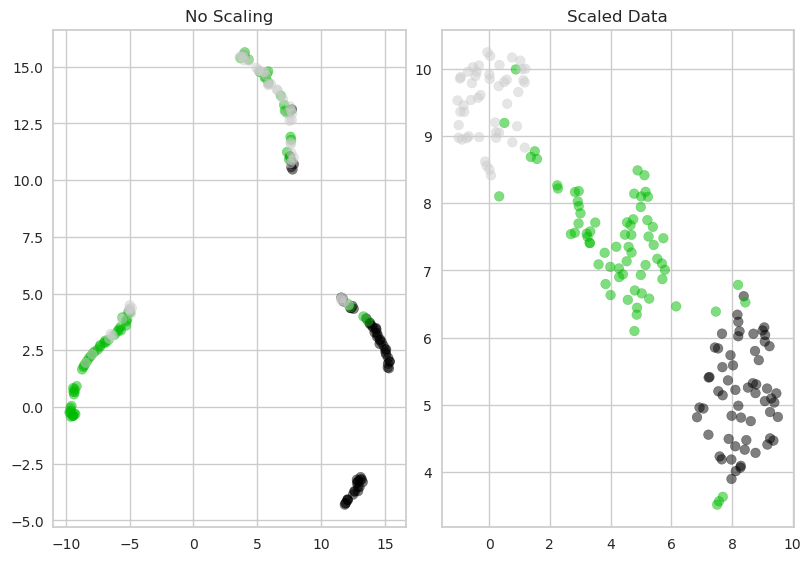

In [78]:
from sklearn.preprocessing import StandardScaler
from umap import UMAP
fix, axs = plt.subplots(1, 2, constrained_layout=True)

scaler = StandardScaler()

embedding_unscaled = UMAP().fit_transform(wine.data)

scaled_data = scaler.fit_transform(wine.data)
embedding_scaled = UMAP().fit_transform(scaled_data)

axs[0].scatter(embedding_unscaled[:, 0], embedding_unscaled[:, 1], c=wine.target, alpha=0.5, cmap='nipy_spectral')
axs[0].set_title('No Scaling')

axs[1].scatter(embedding_scaled[:, 0], embedding_scaled[:, 1], c=wine.target, alpha=0.5, cmap='nipy_spectral')
axs[1].set_title('Scaled Data')

## Encoding

In [79]:
from sklearn.preprocessing import OrdinalEncoder

random_categorical = pd.DataFrame(
    {
    'gender' : ['male', 'male', 'female', 'male', 'female'],
    'smoking_status' : ['yes', 'no', 'yes', 'yes', 'no'],
    'age' : [36, 24, 57, 24, 13]
    }
)

random_categorical # sample dataset with categorical data

,gender,smoking_status,age
0,male,yes,36
1,male,no,24
2,female,yes,57
3,male,yes,24
4,female,no,13


To encode (change from categorical to numerical) we can use OrdinalEncoder(). This works well when we have either a categorical variable with directional values or if we only have two possible values. Ensure that you are ONLY passing it the categorical columns (in this case, we DON'T want to pass it the age column)

In [80]:
encoder = OrdinalEncoder()
unencoded_columns = random_categorical.loc[:, ['gender', 'smoking_status']]
encoded_columns = encoder.fit_transform(unencoded_columns)
random_categorical.loc[:, ['gender', 'smoking_status']] = encoded_columns

random_categorical

,gender,smoking_status,age
0,1.0,1.0,36
1,1.0,0.0,24
2,0.0,1.0,57
3,1.0,1.0,24
4,0.0,0.0,13


To switch back from numerical to categorical, we use the inverse function. Your encoder must be the original encoder model you used to first encode it, or it will not be able to revert it back.

In [81]:
original_columns = encoder.inverse_transform(random_categorical.loc[:, ['gender', 'smoking_status']])
random_categorical.loc[:, ['gender', 'smoking_status']] = original_columns

random_categorical

,gender,smoking_status,age
0,male,yes,36
1,male,no,24
2,female,yes,57
3,male,yes,24
4,female,no,13


# (3) Supervised Learning

## Train-Test Split
With supervised learning, we start with labeled data, split a portion of it off (test set) and use the other portion (train set) to train our model. We can then validate our model by using it on the test set and seeing how well it does.
<br></br>
sklearn makes this easy for us by providing a function which will do exactly that.

In [82]:
from sklearn.model_selection import train_test_split

train_test_split takes three parameters
+ data - the data which will be split
+ target - the identified labels (must be numeric)
+ train_size - the percent which will be used to train versus test, commonly between 50/50 to 80/20, but the choice is ultimately up to you

In [83]:
iris.target # 0, 1, 2 correspond to Iris satosa, Iris versicolour, Iris virginica 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [84]:
pd.DataFrame(iris.data, columns=iris.feature_names) # does not have to be in DF or have column names
# just in DF for ease of viewing

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Note that X (capital) refers to the input dataframe and y (lowercase) refers to the labels, this notation is specific to supervised learning and should not be confused with the data x and y which we use for plotting.

train_test_split gives 4 outputs:
+ X_train - training data set
+ X_test - testing data set
+ y_train - training labels
+ y_test - testing labels

In [85]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.75)
print(X_train.shape) # dataset split by train size
print(X_test.shape) # dataset not included in above dataset
print(y_train.shape) # labels for corresponding X_train
print(y_test.shape) # labels for corresponding X_test

(112, 4)
(38, 4)
(112,)
(38,)


## Classification
There are many different classifier models. Here, we will explore Nearest Neighbors, one of the most widely used methods, as well as Decision Trees, Multilayer Perceptron, and Naive Bayes.
<br></br>
For more info, the sklearn website has a great implementation of visualizing different classifiers. https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py
<br></br>
For a brief overview of each classifier:
+ **Nearest Neighbors** - Imagine we had a 2D dataset with an x axis and a y axis. For our training data, we would classify each point based on the its label. This is our model. For each point in the test set, we get the labels of the nearest points (from the training set) on our XY plane and classify it based on the labels of its neighbors. While a 2D plane is easy to visualize, Nearest Neighbors can be used in any number of dimensions/features.
<br></br>
+ **Decision Tree** - This classifier builds what is called a decision tree based on the data. Imagine a fork in the road with two possible routes to go, and then within each route is an additional fork each with their own additional forks and so on. Now instead of forks in the road, imagine a tree with different limbs that branch out the further you go from the trunk. The base of the tree is where the input goes in and based on the model, it winds up at the very end of a possible branch which is the output label. This is a good way to visualize how decision tree algorithms work.
<br></br>
+ **Multilayer Perceptron** - This is a neural network based classifier. A neural network with a predetermined number of intermediate layers is created based on the training data.
<br></br>
+ **Naive-Bayes** - This is algorithm based on the independence clause in Bayes' Theorem. Each feature (column/variable) is assumed to be independent of every other feature. A probabilistic model is then built around this to arrive at the most likely output for every given input.

In [86]:
from sklearn.neighbors import KNeighborsClassifier # default number of neighbors looked at is 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

Basic Skeleton:

In [87]:
# Pre-Process Data First!!!
classifier = FILL IN # substitute with any classifier
classifier.fit(X_train, y_train) # trains model to training dataset, labels
y_pred = classifier.predict(X_test) # uses modelto predict labels of X_test

SyntaxError: invalid syntax (3668117774.py, line 2)

Doing this yields the array y_pred which is an array of numeric labels that the model has decided. You can compare this with y_test to see the accuracy.

In [88]:
sum(y_pred == y_test) / len(y_test) # percent correct

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

Example using KNeighborsClassifier

In [89]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.8)

classifier = KNeighborsClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

accuracy = sum(y_pred == y_test) / len(y_test)

print(f'Using the KNeighborsClassifier, the model was able to accurately predict {accuracy * 100}% of the test set.')

Using the KNeighborsClassifier, the model was able to accurately predict 93.33333333333333% of the test set.


## Regression

Regression is very much like classification however instead of starting with numeric data and ending with a categorical label, we start with numeric data and end with a numeric output.
<br></br>
We will be exploring Linear Regression, perhaps the simplest model, as well as Nearest Neighbors Regression, Stochastic Gradient Descent Regression, Support Vector Machine, and Bayesian Ridge Regression.
<br></br>
Due to the complex math behind each of these models, we will not go into details but the sklearn website is a great resource for further details.

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

The code behind regression is the exact same as in classification (SEE ABOVE) except instead of y_pred being a collection of numerical labels, it will be a numerical quantitative output.

In [91]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(diabetes.data)

regressors_names = [
    'Linear', 
    'Nearest Neighbors', 
    'Stochastic Gradient Descent', 
    'Support Vector',
    'Bayesian Ridge'
]

regressors = [
    LinearRegression(),
    KNeighborsRegressor(),
    SGDRegressor(),
    SVR(),
    BayesianRidge()
]

regressors_perf = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, diabetes.target, train_size=0.8)
    for i in range(len(regressors)):
        model = regressors[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        difference = y_pred - y_test
        regressors_perf[i].append(abs(np.mean(difference)))
    if n % 50 == 0:
        print(f'Completed {n}/1000 simulations')
        
print('\nAfter 1000 simulations, the average error for each regressor is as follows:')
for i in regressors_perf:
    print(f'\t{regressors_names[i]} : {np.mean(regressors_perf[i])}')



Completed 0/1000 simulations
Completed 50/1000 simulations
Completed 100/1000 simulations
Completed 150/1000 simulations
Completed 200/1000 simulations
Completed 250/1000 simulations
Completed 300/1000 simulations
Completed 350/1000 simulations
Completed 400/1000 simulations
Completed 450/1000 simulations
Completed 500/1000 simulations
Completed 550/1000 simulations
Completed 600/1000 simulations
Completed 650/1000 simulations
Completed 700/1000 simulations
Completed 750/1000 simulations
Completed 800/1000 simulations
Completed 850/1000 simulations
Completed 900/1000 simulations
Completed 950/1000 simulations

After 1000 simulations, the average error for each regressor is as follows:
	Linear : 5.224814766275984
	Nearest Neighbors : 6.850505617977529
	Stochastic Gradient Descent : 5.242450392814155
	Support Vector : 13.686330251805586
	Bayesian Ridge : 5.229886979309669


# (4) Unsupervised Learning

## Dimensionality Reduction
Dimensionality reduction is a technique used to take a dataset with a lot of different dimensions (e.g. columns/features) and reduce each data point down to a lower dimensional space. In this case, we will be reducing our data down to 2D so we can plot it on the XY plane. It's important to note that when dimensions are reduced, the X and Y axis don't represent any specific feature, but rather represent alikeness across every dimension/feature.
<br></br>
The three methods we will be using are in order of their complexity and development data. All three are established in research.
+ Principal Component Analysis (PCA)
+ t-Distributed Stochastic Neighbor Embedding (t-SNE)
+ Uniform Manifold Approximation and Projection (UMAP) 

In [5]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

### Skeleton Code

In [6]:
# Pre-Process Data First!!!
reducer = UMAP()
scaler = StandardScalar()
scaled_data = 
embedding = reducer.fit_transform(wine.data)

### Plotting

In [ ]:
x_vals = embedding[:, 0]
y_vals = embedding[:, 1]

Demonstration

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    axs[i].scatter(x_vals, y_vals, c=wine.target, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])


## Clustering
There are a wide variety of different clustering algorithms. Here, we will only examine K-Means, perhaps the most commonly used clustering algorithm, and HDBSCAN, an improved version of the standard DBSCAN algorithm, which I think is one of the best if the number of clusters is unknown :)
<br></br>
But here is a link to the sklearn implementation of different clustering algorithms with some helpful visualizations of the differences between each algorithm.
https://scikit-learn.org/stable/modules/clustering.html

In [102]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from hdbscan import HDBSCAN

### K-Means
By default, K-Means will attempt to make a guess as to how many clusters there are based on similarity in location. The number of clusters then, will vary. You can however manually set the number of clusters using the n_clusters parameter.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


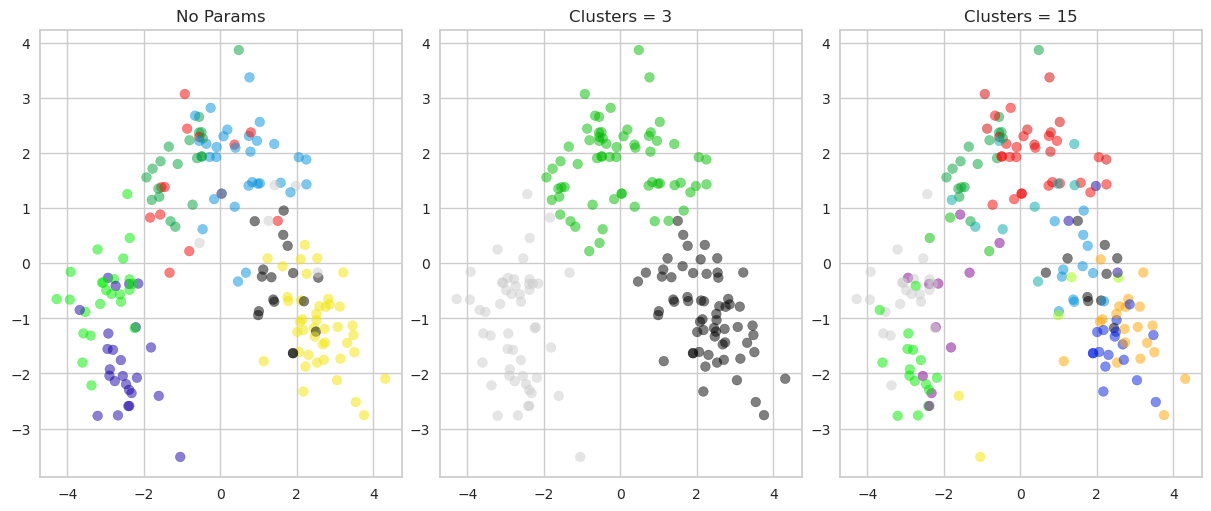

In [103]:
fig, axs = plt.subplots(1, 3, constrained_layout=True)
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

reducer = PCA() # arbitrary for this demo
embedding = reducer.fit_transform(scaled_data)
x_vals = embedding[:, 0]
y_vals = embedding[:, 1]

param_names = ['No Params', 'Clusters = 3', 'Clusters = 15']
cluster_models = [
    KMeans(),
    KMeans(n_clusters=3),
    KMeans(n_clusters=15)
]

for i in range(3):
    labels = cluster_models[i].fit_predict(embedding)
    
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(param_names[i])

### Elbow Plots
How do we figure out whow many clusters to use for KMeans? One way to do this is to create an elbow plot. An elbow plot shows a metric called inertia for various different possible K values. A higher K means a lower inertia score the lower the inertia score the better, but there is a point of diminishing returns. Our aim is to find the number of clusters, K, that results in the best clusters/inertia ratio. You can find this by visualizing the plot as an arm and trying to find the spot that is the elbow.

In [ ]:
# elbow plot method 1
scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

yellowbrick, another package, provides a very convenient visualizer function which automatically graphs an elbow plot and tells you what the best number of clusters is.

In [ ]:
# elbow  plot method 2
visualizer = KElbowVisualizer(KMeans(), k=(1,11))
visualizer.fit(scaled_data)

### Hierarchical Density-Based Spatial Clustering of Applications with Noise
"HDBSCAN is a clustering algorithm developed by Campello, Moulavi, and Sander. It extends DBSCAN by converting it into a hierarchical clustering algorithm, and then using a technique to extract a flat clustering based in the stability of clusters."
https://hdbscan.readthedocs.io/en/latest/how_hdbscan_works.html
<br></br>
Unlike K-Means clustering, HDBSCAN does not allow you to choose the default number of clusters, but if you do not know the exact amount of clusters, it generally performs better than other algorithms. In addition, unlike K-Means clustering, HDBSCAN does not need to assign every value to a label, and you can see the label -1 used when it is not confident about which cluster the data belongs to (this is shown as dark grey on the plot).
<br></br>
Due to the method in which the algorithm works, HDBSCAN is not a good choice for clustering based on PCA.

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

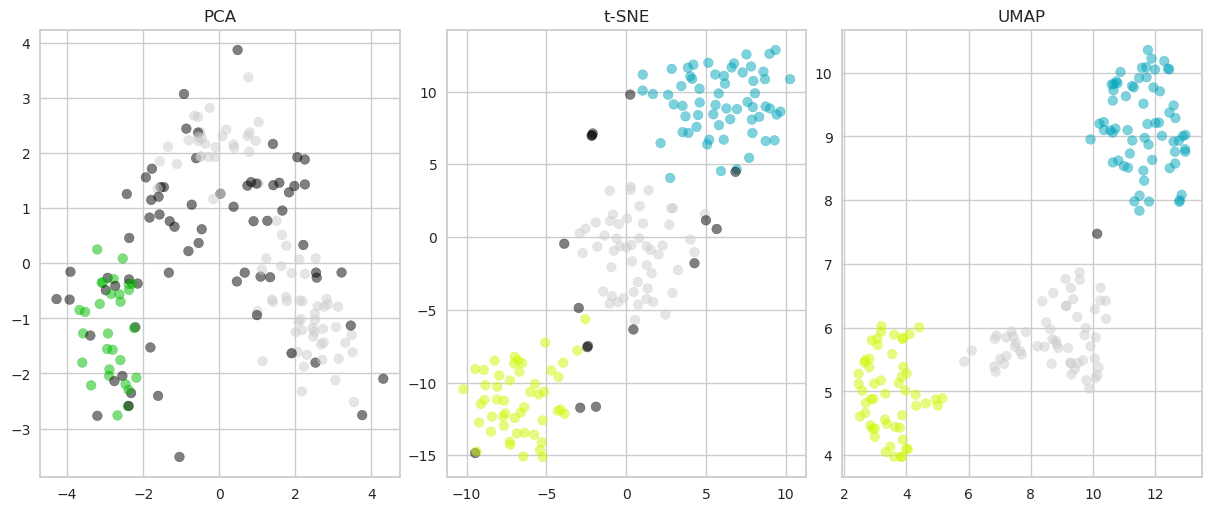

In [104]:
plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

cluster_model = HDBSCAN()

reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    labels = cluster_model.fit_predict(embedding)
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])
    

# (5) Sidenote on Hyperparameters
Nearly every machine learning has a variety of different variables to finetune the performance. Certain algorithms are better than others using the default parameters, but to find the absolute best one, you have to play around. These variables are called hyperparameters and there is good documentation on the scikit-learn/UMAP/HDBSCAN websites. 
<br></br>
There are also a number of functions within sklearn to find the best parameter. This will not be covered in this course and you are not expected to use them, but if you are interested, here is a link to their documentation on finding the best model: https://scikit-learn.org/stable/model_selection.html#model-selection

# (6) Implementation With -Omics Data
Omics data works the exact same as the other data in this tutorial. Just remember to identify which machine learning technique to use, and to use every preprocessing step we talked about:
+ Clean NA values
+ Encode categorical variables into numeric labels
+ Scale data

In [8]:
import os

print("Current working directory: {0}".format(os.getcwd()))

os.chdir('../analysis_data')

print("New working directory: {0}".format(os.getcwd()))

Current working directory: /mnt/c/Users/Anton/Documents/QBIO490/qbio_490_antonwagner/week10_ML
New working directory: /mnt/c/Users/Anton/Documents/QBIO490/qbio_490_antonwagner/analysis_data


In [10]:
import cptac

cptac.download(dataset="Brca")

# 4. Load the breast cancer data set
brca = cptac.Brca()

protein_data = brca.get_proteomics() # get the proteomics data

rna_data = brca.get_transcriptomics()
clinical_data = brca.get_clinical()




# Uncomment and run this command after you get the data, you don't really need to know what it does but it collapses
# the column names and gets rid of the database_IDs which will make our lives much easier!

#protein_data.columns = protein_data.columns.get_level_values(0) 
#rna_data.columns = rna_data.columns.get_level_values(0)
#clinical_data.columns = clinical_data.columns.get_level_values(0)

protein_data 
rna_data
clinical_data

cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.5. Please run 'pip install --upgrade cptac' to update it. (/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/threading.py, line 917)


Name,Replicate_Measurement_IDs,Sample_Tumor_Normal,TMT.Plex,TMT.Channel,Stage,Ischemia.Time.in.Minutes,PAM50,NMF.Cluster,NMF.Cluster.Membership.Score,Age.in.Month,Gender,Ethnicity,ER.Updated.Clinical.Status,PR.Clinical.Status,ERBB2.Updated.Clinical.Status,TNBC.Updated.Clinical.Status,ERBB2.Proteogenomic.Status,TOP2A.Proteogenomic.Status
Patient_ID,,,,,,,,,,,,,,,,,,
CPT000814,CPT000814,Tumor,13,127C,Stage IIA,NaN,Basal,Basal-I,1.000,NaN,NaN,black.or.african.american,negative,negative,NaN,positive,negative,negative
CPT001846,CPT001846,Tumor,12,128C,Stage III,NaN,Basal,Basal-I,0.672,NaN,NaN,white,negative,negative,NaN,positive,negative,negative
X01BR001,X01BR001,Tumor,2,129N,Stage IIB,0.0,Basal,Basal-I,0.782,660.0,female,black.or.african.american,negative,negative,negative,positive,negative,negative
X01BR008,X01BR008,Tumor,16,127C,NaN,NaN,Basal,Basal-I,0.958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative,negative
X01BR009,X01BR009,Tumor,16,127N,NaN,NaN,Basal,Basal-I,0.825,NaN,NaN,NaN,negative,negative,NaN,positive,negative,negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X21BR001,X21BR001,Tumor,16,128N,NaN,NaN,LumB,LumB-I,0.536,NaN,NaN,white,negative,negative,NaN,negative,positive,negative
X21BR002,X21BR002,Tumor,16,128C,NaN,NaN,LumA,LumB-I,0.443,NaN,NaN,white,positive,positive,NaN,negative,negative,negative
X21BR010,X21BR010|X21BR010.REP1,Tumor,3|17,129C|128C,Stage IIA,18.0,LumA,LumA-I,0.559,852.0,female,white,positive,positive,negative,negative,negative,negative


In [ ]:
target = clinical_data.loc[:, 'vitual_status'] 
genes_of_interest = ['TP53', 'MUC16', 'TTN', 'PGR', 'ESR1', 'ERB2']

gene_mask = genes.loc[:, 'gene_name'].isin(genes_of_interest)
ensembl_ids = genes.loc(gene_mask, 'gene_id')
data = counts.loc[ensembl_ids, :].T

scaler = StandardScalar()
data = scalar.fit_transform(data)

encoder = LabelEncoder()
target = encoder. fit_transform(target)

x_train, x_test, y_train, y_test = train_test_split(data, target, train_size = 0.7)

classifier = MLPClassifier()

classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

classifier.score(x_test, y_test)


# (7) Exercises - only this part will be graded
Exercises 1 & 2 will be graded on accuracy. Exercise 3 will be graded on completion and effort. No extra credit will be granted outside of Exercise 4.

**Exercise 1** - Preprocessing/Supervised Learning (3 pt)
1. Fill in the skeleton code to complete the iris classification plot.
2. Answer the following questions:
+ Define the following preprocessing methods and describe why each are necessary
    + NA removal
    + Scaling
    + Encoding
+ What is the difference between classification and regression?

In [1]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()

unscaled_data = iris.data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(iris.data)

classifier = DecisionTreeClassifier() # your choice of which classifier to use

X_train, X_test, y_train, y_test = train_test_split(scaled_data, iris.target, train_size=0.75)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

Visualize your predictions here

Text(0.5, 0.98, 'Comparing Length and Width Between Sepals and Petals')

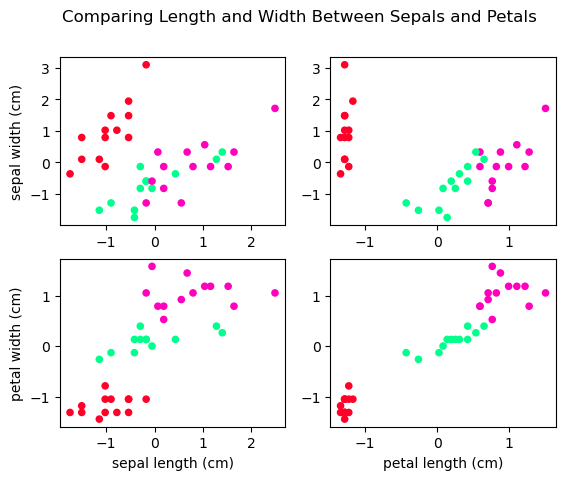

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

iris_df = pd.DataFrame(X_test)

axs[0][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')
axs[0][0].set_ylabel('sepal width (cm)')

axs[0][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 1], c=y_pred, s=20, cmap='gist_rainbow')

axs[1][0].scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][0].set_xlabel('sepal length (cm)')
axs[1][0].set_ylabel('petal width (cm)')

axs[1][1].scatter(iris_df.iloc[:, 2], iris_df.iloc[:, 3], c=y_pred, s=20, cmap='gist_rainbow')
axs[1][1].set_xlabel('petal length (cm)')

fig.suptitle('Comparing Length and Width Between Sepals and Petals')

In [ ]:
# answer questions here

# NA removal - removing NA values is important as leaving them blank is not possible and filling them in can create bias.
# Scaling - turns data into log values that represent the difference from a reference. This allows for simple comparisions.
# Encoding - turns categorically data into numerical values that the computer can interpret. 

# What is the difference between classification and regression?
# Classification is the predicting of a categorical factor from a set of features,
# while regression is predicting a numerical value using a set of features.

**Exercise 2** - Unsupervised Learning (2 pt)
1. Fill in the skeleton code to complete the iris dimensionality reduction and clustering plot.
2. Answer the following questions:
+ What do the axes on a UMAP, t-SNE, or PCA plot represent?
+ Compare the clustered plot vs the actual labels, how close were the clustered labels?

/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


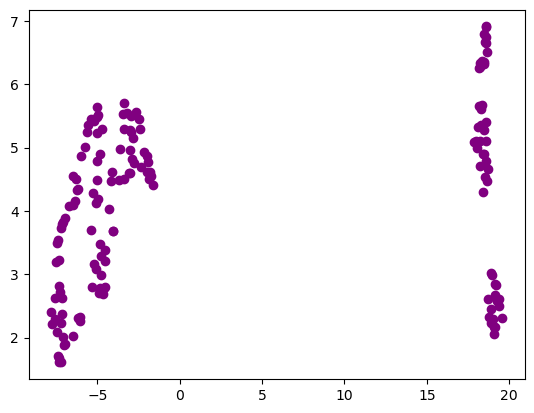

In [4]:
# Step 1) Dimensionality Reduction
from umap import UMAP

reducer = UMAP()

embedding = reducer.fit_transform(scaled_data) # use the scaled_data from exercise 1 for the data

plt.scatter(embedding[:, 0], embedding[:, 1], color='purple')

/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/sklearn/cluster/_kme

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

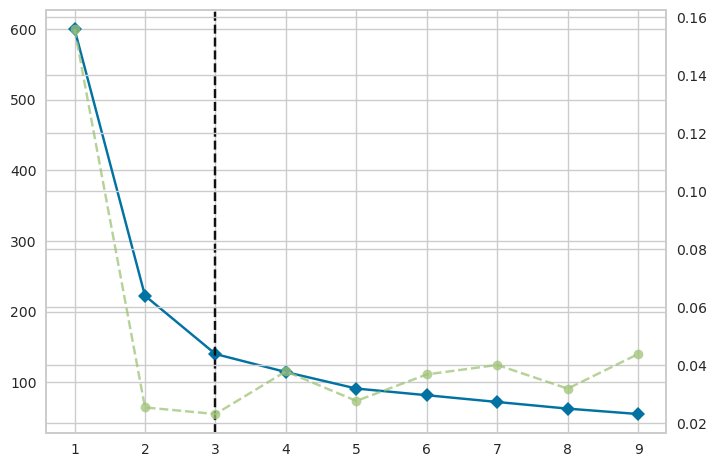

In [7]:
# Step 2) Determination of # of Clusters for KMeans()
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(scaled_data)

/root/miniconda3/envs/qbio_490_antonwagner/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Actual Labels')

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

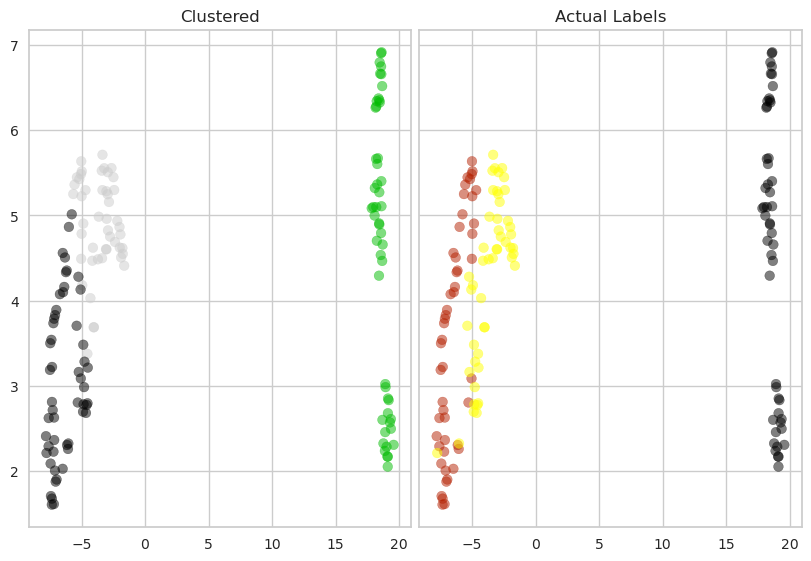

In [8]:
# Step 3) KMeans Clustering
cluster_model = KMeans(n_clusters = 3)

labels = cluster_model.fit_predict(embedding)

fig, axs = plt.subplots(1, 2, constrained_layout=True, sharey=True)

axs[0].scatter(embedding[:, 0], embedding[:, 1], c=labels, cmap='nipy_spectral', alpha=0.5)
axs[0].set_title('Clustered')
axs[1].scatter(embedding[:, 0], embedding[:, 1], c=iris.target, cmap='gnuplot', alpha=0.5)
axs[1].set_title('Actual Labels')

In [ ]:
# answer questions here

# What do the axes on a UMAP, t-SNE, or PCA plot represent?
# The plot axes do not have any specific meaning besides representing variation with distance.

# Compare the clustered plot vs the actual labels, how close were the clustered labels?
# The right most cluster was accurately identified, but the two clusters on the left were somewhat blended together.

**Exercise 3** - Do It Yourself (5 pt)
<br></br>dermatology.csv is a CSV file with 34 different features. The exact description of each feature is in the dermatology.txt file. Each patient has one of the following conditions (this is the 35th column):
+ psoriasis (1)
+ seboreic dermatitis (2)
+ lichen planus (3)
+ pityriasis rosea (4)
+ chronic dermatitis (5)
+ pityriasis rubra pilaris (6)

Part I - Preprocessing (1 pt)
1. Load the data in
2. Separate the target column
3. Preprocess the data using necessary methods

In [60]:
# import libraries
import numpy as np # support for arrays and vectorized operations
import pandas as pd # support for DataFrames and Series
import matplotlib.pyplot as plt # main graphing library
from sklearn.preprocessing import StandardScaler
from umap import UMAP
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier # default number of neighbors looked at is 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge

import warnings
warnings.filterwarnings('ignore')

In [94]:
# write code here

# read in data
dermatology_data = pd.read_csv("dermatology.csv", header=None)

# filter out NAs
NA_mask = np.where(dermatology_data.iloc[:, 33] == '?', False, True)
cleaned_dermatology_data = dermatology_data[NA_mask] 

# separate the data from the target
unscaled_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, :34])
target_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, -1])

# scale the separated data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(unscaled_data)


Part II - Supervised Learning (2 pt)
1. Create a train-test split with an appropriate split-ratio
2. Test at least 3 different classification techniques to determine which is best able to predict skin condition and present it in a graphical method (can be separate or joined figures)
3. Use the age column as a target and create a regression model to predict age from the other features (include skin condition as a feature)

In [58]:
# write code here


# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_data, train_size=0.75)
print(X_train.shape) # dataset split by train size
print(X_test.shape) # dataset not included in above dataset
print(y_train.shape) # labels for corresponding X_train
print(y_test.shape) # labels for corresponding X_test



(268, 34)
(90, 34)
(268, 1)
(90, 1)


In [59]:
# classifier: DecisionTree 

classifier = DecisionTreeClassifier() # substitute with any classifier
classifier.fit(X_train, y_train) # trains model to training dataset, labels
y_pred = classifier.predict(X_test) # uses modelto predict labels of X_test


y_test_list = []
for i in y_test.iloc[:, 0]:
    y_test_list.append(i)

#accuracy = sum(y_pred == np.array(y_test)) / len(y_test) # percent correct
accuracy = sum(y_pred == y_test_list) / len(y_test_list) # percent correct

print(f'Using the DecisionTreeClassifier, the model was able to accurately predict {accuracy * 100}% of the test set.')

Using the DecisionTreeClassifier, the model was able to accurately predict 94.44444444444444% of the test set.


In [55]:
# classifier: KNeighborsClassifier

classifier = KNeighborsClassifier() # substitute with any classifier
classifier.fit(X_train, y_train) # trains model to training dataset, labels
y_pred = classifier.predict(X_test) # uses modelto predict labels of X_test


y_test_list = []
for i in y_test.iloc[:, 0]:
    y_test_list.append(i)

#accuracy = sum(y_pred == np.array(y_test)) / len(y_test) # percent correct
accuracy = sum(y_pred == y_test_list) / len(y_test_list) # percent correct

print(f'Using the KNeighborsClassifier, the model was able to accurately predict {accuracy * 100}% of the test set.')

Using the DecisionTreeClassifier, the model was able to accurately predict 97.77777777777777% of the test set.


In [57]:
# classifier: MLPClassifier 

classifier = MLPClassifier() # substitute with any classifier
classifier.fit(X_train, y_train) # trains model to training dataset, labels
y_pred = classifier.predict(X_test) # uses modelto predict labels of X_test


y_test_list = []
for i in y_test.iloc[:, 0]:
    y_test_list.append(i)

#accuracy = sum(y_pred == np.array(y_test)) / len(y_test) # percent correct
accuracy = sum(y_pred == y_test_list) / len(y_test_list) # percent correct

print(f'Using the MLPClassifier, the model was able to accurately predict {accuracy * 100}% of the test set.')

Using the DecisionTreeClassifier, the model was able to accurately predict 93.33333333333333% of the test set.


In [93]:
# Regresssion Model


# separate the data from the target
columns = []
for x in range(33):
    columns.append(True)
columns.append(False)
columns.append(True)
unscaled_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, columns])
target_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, -2])

# scale the separated data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(unscaled_data)

regressors_names = [
    'Linear', 
    'Nearest Neighbors', 
    'Stochastic Gradient Descent', 
    'Support Vector',
    'Bayesian Ridge'
]

regressors = [
    LinearRegression(),
    KNeighborsRegressor(),
    SGDRegressor(),
    SVR(),
    BayesianRidge()
]

regressors_perf = {
    0: [],
    1: [],
    2: [],
    3: [],
    4: []
}

for n in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(scaled_data, target_data, train_size=0.8)
    for i in range(len(regressors)):
        model = regressors[i]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        y_test_list = []
        for i in y_test.iloc[:, 0]:
            y_test_list.append(i)                                       
        
        y_pred_list = []
        for i in y_pred[:]:
            y_pred_list.append(i)                                       
        
        
        
        difference = y_pred - y_test
 
        #difference = []
        #for x in range(len(y_test_list)):
        #    difference.append(y_pred[x] - y_test_list[x])
        
        regressors_perf[i].append(abs(np.mean(difference)))
    if n % 50 == 0:
        print(f'Completed {n}/1000 simulations')
        
print('\nAfter 1000 simulations, the average error for each regressor is as follows:')
for i in regressors_perf:
    print(f'\t{regressors_names[i]} : {np.mean(regressors_perf[i])}')

TypeError: unsupported operand type(s) for -: 'float' and 'str'

Part III - Unsupervised Learning (2 pt)
1. Use all three dimensionality-reduction techniques to show the data from Part I in 2D (can be separate or joined figures) Pick the dimensionality-reduction technique which results in the greatest separation
2. Create an elbow plot to determine the K number of clusters for K-Means
3. Cluster based on K-Means and HDBSCAN in a figure which shows both methods side by side

In [98]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

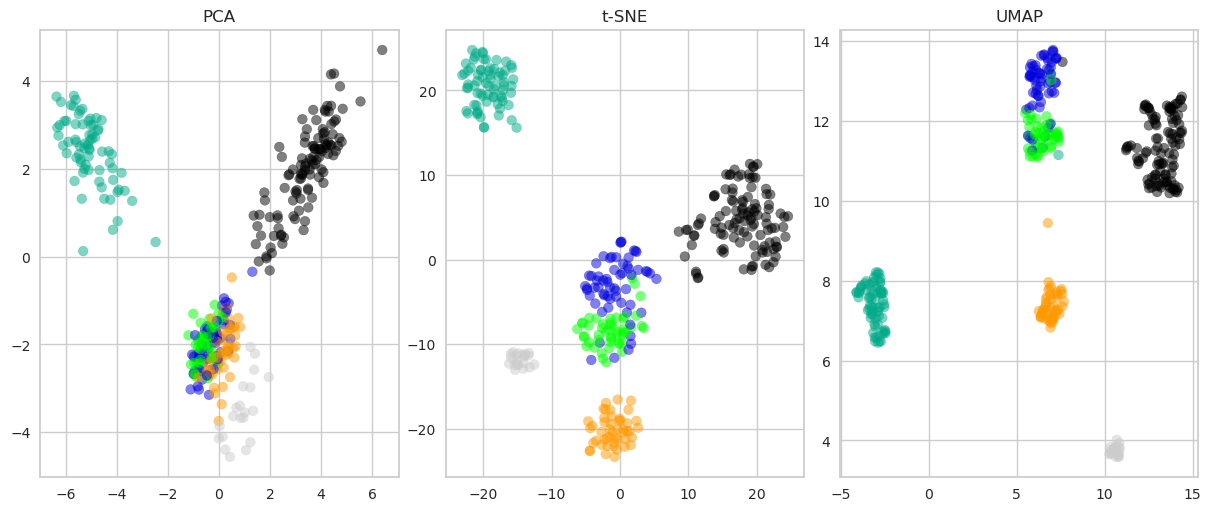

In [99]:
# write code here

#1.

dermatology_data = pd.read_csv("dermatology.csv", header=None)

# filter out NAs
NA_mask = np.where(dermatology_data.iloc[:, 33] == '?', False, True)
cleaned_dermatology_data = dermatology_data[NA_mask] 

# separate the data from the target
unscaled_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, :34])
target_data = pd.DataFrame(cleaned_dermatology_data.iloc[:, -1])

# scale the separated data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(unscaled_data)


plt.rcParams['figure.figsize'] = [12, 5]


reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    axs[i].scatter(x_vals, y_vals, c=target_data, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])



KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9), k=(1, 10))

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

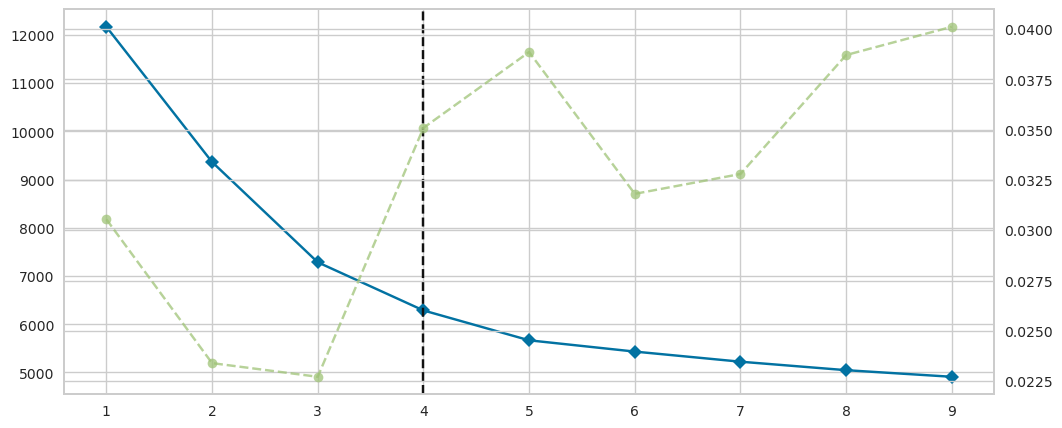

In [100]:
#2

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(1, 10))
visualizer.fit(scaled_data)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the fo

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


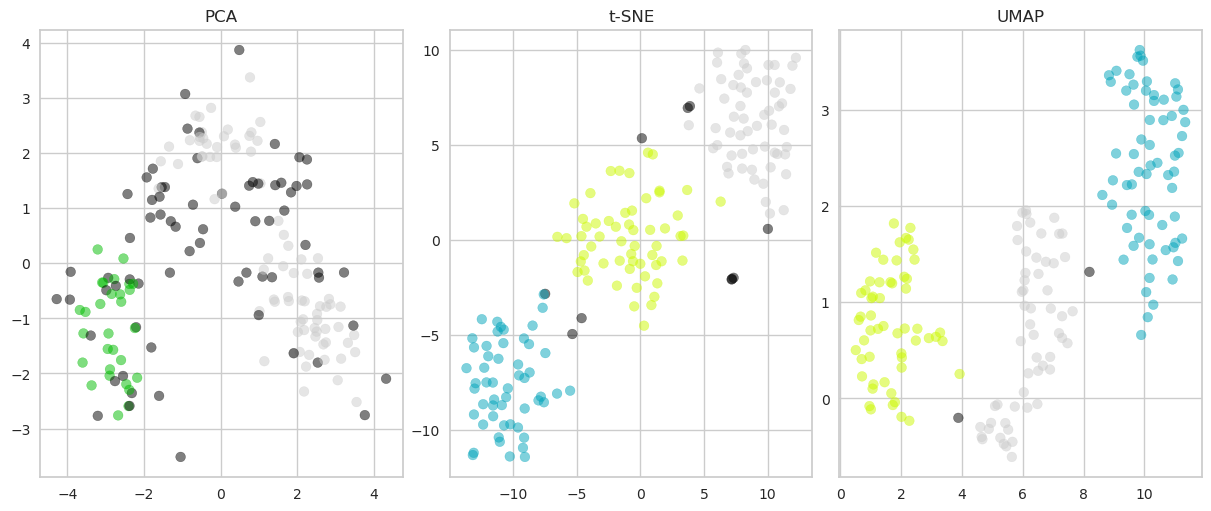

In [105]:
# 3
from hdbscan import HDBSCAN

plt.rcParams['figure.figsize'] = [12, 5]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(wine.data)

cluster_model = HDBSCAN()

reducers = [
    PCA(),
    TSNE(),
    UMAP()
]
reducers_names = ['PCA', 't-SNE', 'UMAP']

fig, axs = plt.subplots(1, 3, constrained_layout=True)

for i in range(3):
    embedding = reducers[i].fit_transform(scaled_data)
    x_vals = embedding[:, 0]
    y_vals = embedding[:, 1]
    labels = cluster_model.fit_predict(embedding)
    axs[i].scatter(x_vals, y_vals, c=labels, cmap='nipy_spectral', alpha=0.5)
    axs[i].set_title(reducers_names[i])
    

Part IV - Brief Response (REQUIRED IN ORDER TO GET CREDIT FOR EACH OTHER PART)
<br></br>
Answer the following questions if you completed the part:
1. Which of the preprocessing techniques were required for the data? How did you know?
2. Which supervised learning technique (classification vs regression) was best able to predict its respective target? Why do you think so?
3. Interpret what the distance between each point represents on the reduced dimensions figure.

In [ ]:
# answer questions here
# 1. Masking the age columns to removal NA values was required since 8 '?' values were mentioned in the text file.
#    Scaling was also necessary since the data values were in log change from a reference form.
#    Only the last column needed to be encoded as those were the only categorical values.
# 2. The KNeighbors Classifier worked the best as it was able to consistantly make predictions with 94% - 98% accuracy.
#    I think classification is generally more accurate than regression because it does not need to make a numerical
#    value prediction which seems more difficult than match a categorical value from limited options. 
# 3. The distance between points represents their degree of variation. The further points are apart, the less similar they are.

**Exercise 4** - Challenge - Extra Credit (5 pts possible) <br>
</br>
INDIVIDUAL WORK ONLY - credit will be awarded based on thoughtful completion and demonstration of an understanding of ML principles, <u>code comments must be included</u>
<br></br>mushroom.csv is a dataset includes 61069 hypothetical mushrooms with caps based on 173 species (353 mushrooms per species). Each mushroom is identified as edible or poisonous. Of the 20 variables, 17 are nominal and 3 are metrical. The features and dataset design can be found in mushroom.txt. Your task is as follows:
+ Load and process the data (one challenge we often find ourselves facing is having to reformat data, this will be an exercise in that) from the .csv file
+ Create a classifier design and test that it can correctly identify whether a mushroom is edible or poisonous with a minimum accuracy of no lower than 95%. You will determine this by testing it on a 60/40 train-test split 20 times.

In [ ]:
# write code here